In [1]:
# Import dependencies
from matplotlib import style
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy import Column, Integer
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy.ext.declarative import declarative_base

In [2]:
# Read CSV into dataframe
earthquake_df = pd.read_csv(r"C:\Users\stave\OneDrive\Desktop\Bootcamp\Project 3\Project3_group\Resources\eq_data.csv")
earthquake_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-12-31T12:12:26.650Z,33.397500,-116.393333,3.880,4.14,mw,132.0,16.0,0.07391,0.190,...,2023-01-28T07:44:58.915Z,"16km N of Borrego Springs, CA",earthquake,0.10,0.380,NaN,6.0,reviewed,ci,ci
1,2022-12-31T11:41:09.460Z,34.355667,-116.921833,4.730,3.47,mw,121.0,25.0,0.07845,0.150,...,2023-01-26T07:49:51.327Z,"11km SSE of Lucerne Valley, CA",earthquake,0.09,0.410,NaN,4.0,reviewed,ci,ci
2,2022-12-22T02:22:50.250Z,37.620167,-122.025000,3.820,3.34,mw,141.0,16.0,NaN,0.160,...,2023-01-25T22:06:18.040Z,"3km N of Union City, CA",earthquake,0.10,0.170,NaN,3.0,reviewed,nc,nc
3,2022-12-20T15:30:01.280Z,40.565667,-123.976667,20.100,3.01,ml,37.0,46.0,0.07691,0.140,...,2023-01-02T19:22:16.040Z,"10km E of Hydesville, CA",earthquake,0.22,0.340,0.274,22.0,reviewed,nc,nc
4,2022-12-17T11:39:42.860Z,37.918167,-122.304000,5.480,3.57,mw,170.0,19.0,0.01598,0.150,...,2023-01-26T11:43:49.966Z,"1km ENE of El Cerrito, CA",earthquake,0.10,0.170,NaN,4.0,reviewed,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7444,2000-01-06T21:38:10.940Z,38.844000,-122.825667,1.500,3.85,mw,56.0,31.0,0.04054,0.070,...,2016-12-31T04:05:30.360Z,"9 km WNW of Cobb, California",earthquake,0.13,0.430,NaN,5.0,reviewed,nc,nc
7445,2000-01-03T21:59:31.780Z,34.101000,-117.008000,2.269,3.49,ml,0.0,22.4,NaN,0.192,...,2016-04-02T04:01:25.781Z,"8km NNE of Yucaipa, CA",earthquake,NaN,0.122,NaN,221.0,reviewed,ci,ci
7446,2000-01-02T17:58:32.820Z,34.309000,-116.072000,0.801,3.14,ml,0.0,65.5,NaN,0.172,...,2016-04-02T00:47:38.523Z,"19km N of Twentynine Palms, CA",earthquake,NaN,0.252,NaN,178.0,reviewed,ci,ci
7447,2000-01-02T15:49:40.650Z,38.038333,-118.696000,-0.903,3.11,md,51.0,107.0,0.22520,0.060,...,2018-04-24T22:21:49.943Z,"31 km NW of Benton, California",earthquake,0.20,6.580,0.180,73.0,reviewed,nc,nc


In [3]:
# Create engine 
engine = create_engine(f"sqlite:///Resources/earthquakes.db", pool_pre_ping= True)
eq_data = earthquake_df.to_sql("eq_data", engine, if_exists= "replace")

In [4]:
# Create Database connection
conn = engine.connect()
session = Session(bind=engine)

In [5]:
Base = declarative_base()
Base.metadata.create_all(engine)

In [6]:
bins = [3.0, 3.99, 4.99, 5.99, 6.99, 7.99]
eq_by_mag = earthquake_df['mag'].value_counts(bins=bins, sort =False)
eq_by_mag

(2.999, 3.99]    6788
(3.99, 4.99]      619
(4.99, 5.99]       37
(5.99, 6.99]        4
(6.99, 7.99]        1
Name: mag, dtype: int64

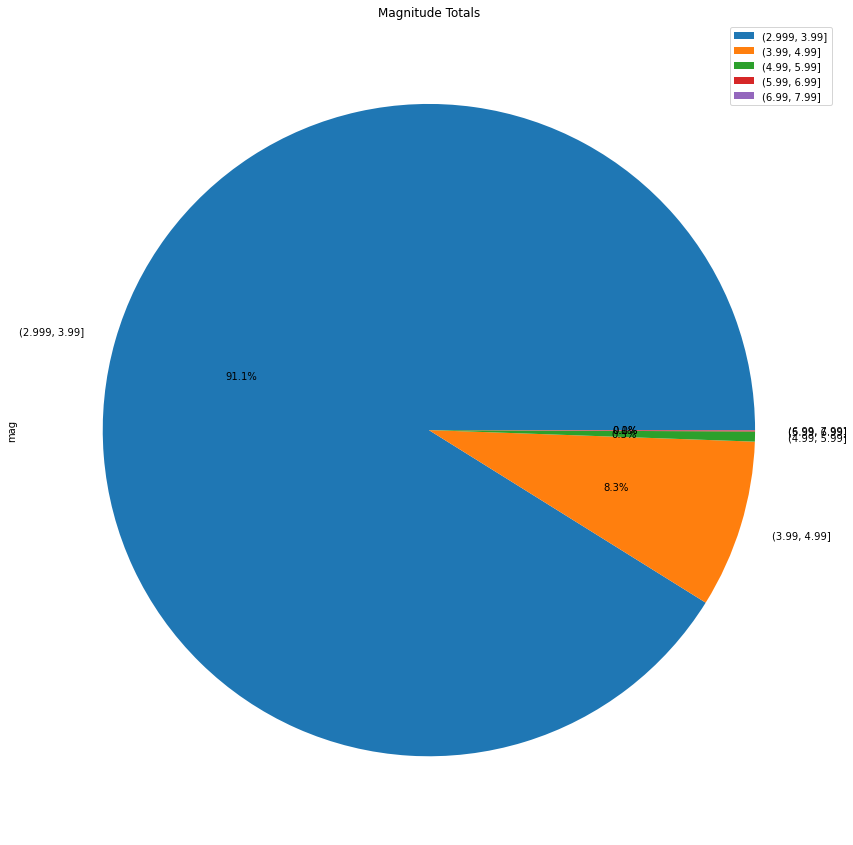

In [7]:
eq_by_mag.plot.pie(figsize= (15,15), title= "Magnitude Totals", autopct= '%1.1f%%', legend= True)
plt.savefig('Magnitude Pie Chart')

In [9]:
eq_2022 = earthquake_df.loc[earthquake_df['time'].str.contains('2022')].count()
eq_2021 = earthquake_df.loc[earthquake_df['time'].str.contains('2021')].count()
eq_2020 = earthquake_df.loc[earthquake_df['time'].str.contains('2020')].count()
eq_2019 = earthquake_df.loc[earthquake_df['time'].str.contains('2019')].count()
eq_2018 = earthquake_df.loc[earthquake_df['time'].str.contains('2018')].count()
eq_2017 = earthquake_df.loc[earthquake_df['time'].str.contains('2017')].count()
eq_2016 = earthquake_df.loc[earthquake_df['time'].str.contains('2016')].count()
eq_2015 = earthquake_df.loc[earthquake_df['time'].str.contains('2015')].count()
eq_2014 = earthquake_df.loc[earthquake_df['time'].str.contains('2014')].count()
eq_2013 = earthquake_df.loc[earthquake_df['time'].str.contains('2013')].count()
eq_2012 = earthquake_df.loc[earthquake_df['time'].str.contains('2012')].count()
eq_2011 = earthquake_df.loc[earthquake_df['time'].str.contains('2011')].count()
eq_2010 = earthquake_df.loc[earthquake_df['time'].str.contains('2010')].count()
eq_2009 = earthquake_df.loc[earthquake_df['time'].str.contains('2009')].count()
eq_2008 = earthquake_df.loc[earthquake_df['time'].str.contains('2008')].count()
eq_2007 = earthquake_df.loc[earthquake_df['time'].str.contains('2007')].count()
eq_2006 = earthquake_df.loc[earthquake_df['time'].str.contains('2006')].count()
eq_2005 = earthquake_df.loc[earthquake_df['time'].str.contains('2005')].count()
eq_2004 = earthquake_df.loc[earthquake_df['time'].str.contains('2004')].count()
eq_2003 = earthquake_df.loc[earthquake_df['time'].str.contains('2003')].count()
eq_2002 = earthquake_df.loc[earthquake_df['time'].str.contains('2002')].count()
eq_2001 = earthquake_df.loc[earthquake_df['time'].str.contains('2001')].count()
eq_2000 = earthquake_df.loc[earthquake_df['time'].str.contains('2000')].count()

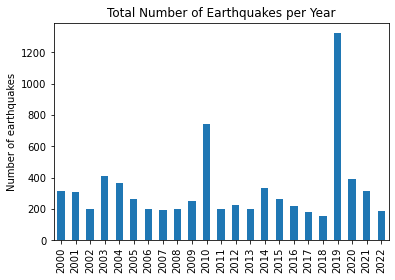

In [10]:
eq_per_year = pd.Series(index=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], 
    data = [eq_2000['time'], eq_2001['time'] ,eq_2002['time'], eq_2003['time'], eq_2004['time'], eq_2005['time'], eq_2006['time'], eq_2007['time'], eq_2008['time'], eq_2009['time'], 
    eq_2010['time'], eq_2011['time'], eq_2012['time'], eq_2013['time'], eq_2014['time'], eq_2015['time'], eq_2016['time'], eq_2017['time'], eq_2018['time'], eq_2019['time'], eq_2020['time'],
    eq_2021['time'], eq_2022['time']])
eq_per_year.plot.bar(ylabel= "Number of earthquakes", title= "Total Number of Earthquakes per Year")
plt.savefig('Total Earthquakes by Year')

In [11]:
eq_2022_ = earthquake_df.loc[earthquake_df['time'].str.contains('2022')]
eq_2022_mag =  eq_2022_['mag'].max()
eq_2021_ = earthquake_df.loc[earthquake_df['time'].str.contains('2021')]
eq_2021_mag =  eq_2021_['mag'].max()
eq_2020_ = earthquake_df.loc[earthquake_df['time'].str.contains('2020')]
eq_2020_mag =  eq_2020_['mag'].max()
eq_2019_ = earthquake_df.loc[earthquake_df['time'].str.contains('2019')]
eq_2019_mag =  eq_2019_['mag'].max()
eq_2018_ = earthquake_df.loc[earthquake_df['time'].str.contains('2018')]
eq_2018_mag =  eq_2018_['mag'].max()
eq_2017_ = earthquake_df.loc[earthquake_df['time'].str.contains('2017')]
eq_2017_mag =  eq_2017_['mag'].max()
eq_2016_ = earthquake_df.loc[earthquake_df['time'].str.contains('2016')]
eq_2016_mag =  eq_2016_['mag'].max()
eq_2015_ = earthquake_df.loc[earthquake_df['time'].str.contains('2015')]
eq_2015_mag =  eq_2015_['mag'].max()
eq_2014_ = earthquake_df.loc[earthquake_df['time'].str.contains('2014')]
eq_2014_mag =  eq_2014_['mag'].max()
eq_2013_ = earthquake_df.loc[earthquake_df['time'].str.contains('2013')]
eq_2013_mag =  eq_2013_['mag'].max()
eq_2012_ = earthquake_df.loc[earthquake_df['time'].str.contains('2012')]
eq_2012_mag =  eq_2012_['mag'].max()
eq_2011_ = earthquake_df.loc[earthquake_df['time'].str.contains('2011')]
eq_2011_mag =  eq_2011_['mag'].max()
eq_2010_ = earthquake_df.loc[earthquake_df['time'].str.contains('2010')]
eq_2010_mag =  eq_2010_['mag'].max()
eq_2009_ = earthquake_df.loc[earthquake_df['time'].str.contains('2009')]
eq_2009_mag =  eq_2009_['mag'].max()
eq_2008_ = earthquake_df.loc[earthquake_df['time'].str.contains('2008')]
eq_2008_mag =  eq_2008_['mag'].max()
eq_2007_ = earthquake_df.loc[earthquake_df['time'].str.contains('2007')]
eq_2007_mag =  eq_2007_['mag'].max()
eq_2006_ = earthquake_df.loc[earthquake_df['time'].str.contains('2006')]
eq_2006_mag =  eq_2006_['mag'].max()
eq_2005_ = earthquake_df.loc[earthquake_df['time'].str.contains('2005')]
eq_2005_mag =  eq_2005_['mag'].max()
eq_2004_ = earthquake_df.loc[earthquake_df['time'].str.contains('2004')]
eq_2004_mag =  eq_2004_['mag'].max()
eq_2003_ = earthquake_df.loc[earthquake_df['time'].str.contains('2003')]
eq_2003_mag =  eq_2003_['mag'].max()
eq_2002_ = earthquake_df.loc[earthquake_df['time'].str.contains('2002')]
eq_2002_mag =  eq_2002_['mag'].max()
eq_2001_ = earthquake_df.loc[earthquake_df['time'].str.contains('2001')]
eq_2001_mag =  eq_2001_['mag'].max()
eq_2000_ = earthquake_df.loc[earthquake_df['time'].str.contains('2000')]
eq_2000_mag =  eq_2000_['mag'].max()

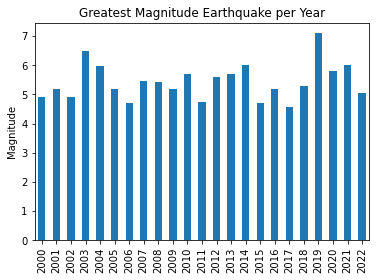

In [12]:
mag_per_year = pd.Series(index=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], 
    data = [eq_2000_mag, eq_2001_mag, eq_2002_mag, eq_2003_mag, eq_2004_mag, eq_2005_mag, eq_2006_mag, eq_2007_mag, eq_2008_mag, eq_2009_mag, eq_2010_mag, 
    eq_2011_mag, eq_2012_mag, eq_2013_mag, eq_2014_mag, eq_2015_mag, eq_2016_mag, eq_2017_mag, eq_2018_mag, eq_2019_mag, eq_2020_mag, eq_2021_mag, eq_2022_mag])
mag_per_year.plot.bar(ylabel= "Magnitude", title= "Greatest Magnitude Earthquake per Year")
plt.savefig('Greatest Magnitude')